In [1]:
import sys
sys.path.append(".")
import numpy as np
import matplotlib.pyplot as plt
import random
#from ga_tsm_objects import node as city
%run GA_TSM_Objects.ipynb


In [2]:
#generate nodelist
def generateNode(size):
    nodeList = []

    points = [[random.random()*100 for i in range(2)] for j in range(size)]
    points2 = []
    
    for x in points:
        if x not in points2:
            points2.append(x)

    
    for i in range(len(points2)):
        
        nodeList.append(Node(points2[i][0],points2[i][1]))
    
    return nodeList

#generate initial population
def genPopulation(popN,nodeList):
    
    population = []
    for i in range(popN):
        
        individual = genIndividual(nodeList)
        population.append(individual)
        
    return population

#generate individual
def genIndividual(nodeList):
    
    individual = random.sample(nodeList,len(nodeList))
    individualWithFitnes = Fitness(individual)
    
    individualWithFitnes
    return individualWithFitnes

#select individuals for mating from population
def tournamentSelection(population,tournamentSize):
    
    tournamentList = []
    
    for i in range(tournamentSize):
        
        randomIndex = int(random.random() * len(population))
        tournamentList.append(population[randomIndex])
    
    return getFittest(tournamentList)
        
    

#getThe most fit individual
def getFittest(population):
    
    fittest = population[0]
    
    for i in range(len(population)):
        
        if(fittest.routeFitness() <= population[i].routeFitness()):
            
            fittest = population[i]
    
    return fittest

#crossover

def crossover(p1,p2):
    
    offspring = Fitness([])
    geneSize = p1.geneSize()
    
    j = int(random.random() * geneSize)
    k = int(random.random() * geneSize)
    
    temp1,temp2 = j,k
    
    j = min(temp1,temp2)
    k = max(temp1,temp2)
    
            
    for i in range(geneSize):
            
        offspring.route.append(Node(0,0))
    
    for i in range(j,k):
            
        #if(j < k and i > j and i < k):
            
        offspring.route[i] = p1.route[i]
        
        '''elif j > k:
            if not (i < j and i > k):
                offspring.route[i] = p1.route[i]'''
       
    for i in range(geneSize):
            
            if not(any(xy.getXY() == p2.route[i].getXY() for xy in offspring.route)):
                
                for l in range(geneSize):
                    
                    if offspring.route[l].getXY() == Node(0,0).getXY():
                        offspring.route[l] = p2.route[i]
                        break
    
    return offspring
    
                        

#step two mutation
def mutate(individual,mutationRate):
    
    for i in range(individual.geneSize()):
        
        if random.random() < mutationRate:
            index = int(individual.geneSize() * random.random())
            
            individual.route[index], individual.route[i] = individual.route[i],individual.route[index]
    
    return individual
#mutate population
def mutatePopulation(population,mutationRate):
        
    newpopulation = []
    
    for i in range(len(population)):
        
        newpopulation.append(mutate(population[i],mutationRate))
    
    return newpopulation
        
#GA evolution func
def evolve(elliteN,population,mutationRate):
    
    newGeneration = []
    nextGeneration = []
    
    for i in range(elliteN):
        newGeneration.insert(i,getFittest(population))
  
    for i in range(elliteN,len(population)):
        
        p1 = tournamentSelection(population,2)
        p2 = tournamentSelection(population,2)
        
        offspring = crossover(p1,p2)
        newGeneration.append(offspring)
    
    bestRoute = newGeneration[:elliteN]
    nextGeneration = mutatePopulation(newGeneration[elliteN:],mutationRate)
    
    for i in range(elliteN):
        nextGeneration.insert(i,bestRoute[i])
    
    
    return nextGeneration
            
    
    
    

    
    

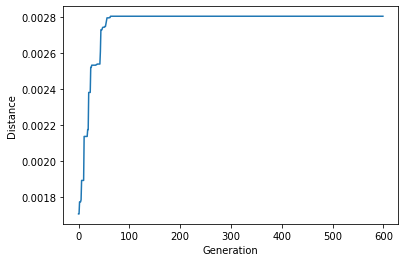

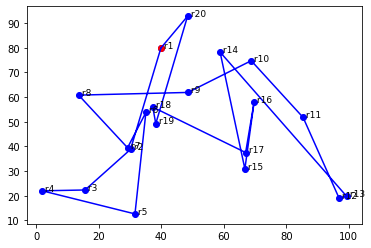

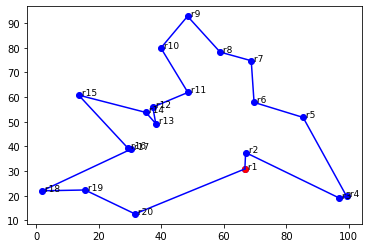

In [8]:
FinalGeneration = None 
maxIter = 600
elliteN = 5
cityN = 20
popN = 600
mutationRate=0.01

optimizationProgress = []

cities = generateNode(cityN)
initialPopulation = genPopulation(popN,cities)


for i in range(maxIter):
    if i == 0:
        FinalGeneration = evolve(elliteN,initialPopulation.copy(),mutationRate)
    else:
        FinalGeneration = evolve(elliteN,FinalGeneration,mutationRate)
    optimizationProgress.append(getFittest(FinalGeneration).routeFitness())
#cost comparision over GA itration
plt.plot(optimizationProgress)
plt.ylabel('Distance')
plt.xlabel('Generation')
plt.show()

#route comparision of fittesst individual from initial population and final population
firstGenFittest = getFittest(initialPopulation)
lastGenFittest = getFittest(FinalGeneration)

x = []
y = []


xi = []
yi = []

for i in range(len(firstGenFittest.route)):
    
    x.append(firstGenFittest.route[i].getXY()[0])
    y.append(firstGenFittest.route[i].getXY()[1])
    
    xi.append(lastGenFittest.route[i].getXY()[0])
    yi.append(lastGenFittest.route[i].getXY()[1])

#plt.scatter(x,y)

for i in range(len(x)):
    xe = x[i]
    ye = y[i]
    plt.scatter(xe, ye,color='blue')
    plt.text(xe, ye, " r" + str(i+1), fontsize=9)


plt.scatter([x[0]],y[0],color='red')
plt.plot(x,y,color='blue')
plt.plot([x[-1],x[0]],[y[-1],y[0]],color='blue')
plt.plot([x[0]],y[0],color="red")
plt.show()

#plt.scatter(xi,yi)
for i in range(len(x)):
    xe = xi[i]
    ye = yi[i]
    plt.scatter(xe, ye,color='blue')
    plt.text(xe, ye, " r" + str(i+1), fontsize=9)

plt.scatter([xi[0]],yi[0],color='red')
plt.plot(xi,yi,color='blue')
plt.plot([xi[-1],xi[0]],[yi[-1],yi[0]],color='blue')
plt.show()